### Geographic Data
Using census place data with health measures, combining with Portland Maps data.

5/19/2021 NOTE: The PLACES data is not small enough to compare at a portland neighborhood level. Save this import process for another analysis, and instead, pull in some data from Portland Maps like neighborhood regions.


----

In [1]:
import requests
import io
import pandas as pd
import geopandas as gpd
import zipfile
from os import path
import json
import urllib.request

First, download the TIGER place shapefiles form the US census site and save it as a geojson file. If that file is already available, load the existing file.
Thanks https://medium.com/@loldja/reading-shapefile-zips-from-a-url-in-python-3-93ea8d727856 for the tips!

In [2]:
def download_shapefile(url, loc_path):
    
    if path.exists(loc_path):
        p = gpd.read_file(loc_path)
        print("File is ready.")
    else:
        print("Downloading shapefile...")
        r = requests.get(url)
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(path=loc_path) 
        print(f"Downloaded complete.")
        p = gpd.read_file(loc_path)
    
    return p
        

In [14]:
url = 'https://www2.census.gov/geo/tiger/TIGER2019/PLACE/tl_2019_41_place.zip' # 'places' in Oregon
local_path = 'OR_places_shapefiles/'

oregon_places = download_shapefile(url, local_path)

File is ready.


Shape of the dataframe: (378, 17)
  STATEFP PLACEFP   PLACENS    GEOID      NAME       NAMELSAD LSAD CLASSFP  \
0      41   07200  02409873  4107200  Boardman  Boardman city   25      C1   
1      41   33550  02410745  4133550   Heppner   Heppner city   25      C1   

  PCICBSA PCINECTA  MTFCC FUNCSTAT    ALAND   AWATER     INTPTLAT  \
0       N        N  G4110        A  9765525  1037107  +45.8365075   
1       N        N  G4110        A  3185255    15741  +45.3529944   

       INTPTLON                                           geometry  
0  -119.6927928  POLYGON ((-119.72650 45.84776, -119.72620 45.8...  
1  -119.5605690  POLYGON ((-119.56749 45.36260, -119.56728 45.3...  


<AxesSubplot:>

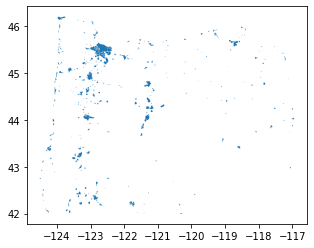

In [16]:
print("Shape of the dataframe: {}".format(oregon_places.shape))
print(oregon_places.head(2))

oregon_places.plot()

Next, download the PLACES data, which contains many health risk measures for each place and can be joined to the places geographic data. The PLACES api can be used to filter for just the Oregon data. The file is saved to a csv in the local path, and if it is already there, we just read the existing file.

In [5]:
plc_link = "https://chronicdata.cdc.gov/resource/vgc8-iyc4.json?stateabbr=OR"

if path.exists("SHAPE_places.csv"):
    places_data = pd.read_csv("SHAPE_places.csv")
    print("Data is ready.")
else:
    print("Downloading json...")
    response = requests.get(plc_link)
    print(f"Done; response code: {response.status_code}")
    places_data = pd.json_normalize(response.json())
    places_data.to_csv("SHAPE_places.csv")

places_data.head()

Data is ready.


,Unnamed: 0,stateabbr,statedesc,placename,placefips,totalpopulation,access2_crudeprev,access2_crude95ci,arthritis_crudeprev,arthritis_crude95ci,...,obesity_adjprev,obesity_adj95ci,phlth_adjprev,phlth_adj95ci,sleep_adjprev,sleep_adj95ci,stroke_adjprev,stroke_adj95ci,teethlost_adjprev,teethlost_adj95ci
0,0,OR,Oregon,Cayuse,4111900,68,11.6,"( 9.5, 14.1)",34.0,"(32.3, 35.6)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,OR,Oregon,Peoria,4157300,94,12.5,"(10.1, 14.9)",34.5,"(32.5, 36.4)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,OR,Oregon,Rickreall,4161800,77,11.8,"( 9.4, 15.0)",31.5,"(29.6, 33.2)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,OR,Oregon,Seventh Mountain,4166385,187,7.9,"( 5.8, 10.5)",43.8,"(40.6, 46.4)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,OR,Oregon,Summit,4170870,82,8.9,"( 6.6, 11.9)",30.9,"(28.4, 33.5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next up, download data from OR, WA, and CA state parks.

- [Washinton (2021)](https://geo.wa.gov/datasets/3385b003af5248e59c1fa68e1411c446_0/explore?location=47.238350%2C-120.706500%2C7.63)
- [Oregon (2010)](https://spatialdata.oregonexplorer.info/osdl-geoportal/catalog/search/resource/details.page?uuid=%7B9ED99BB8-3640-4819-86F8-0CBFD377124F%7D)
    Oregon's available map data from 2018 and 2014 was not accessible for download online.
- [California (2020)](https://www.parks.ca.gov/?page_id=29682)

In [29]:
WA_link = "https://opendata.arcgis.com/datasets/3385b003af5248e59c1fa68e1411c446_0.geojson"
OR_link = "http://navigator.state.or.us/sdl/data/shapefile/k24/ORStateParks.zip"   
CA_link = "https://opendata.arcgis.com/datasets/0fea4fa1db734794bdb3b5410bb3eed9_0.zip?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"

#WA = gpd.read_file(WA_link)
#OR = gpd.read_file(OR_link)
#CA = download_shapefile(CA_link, "CA_state_parks/shapefiles/")

Downloaded complete.


<AxesSubplot:>

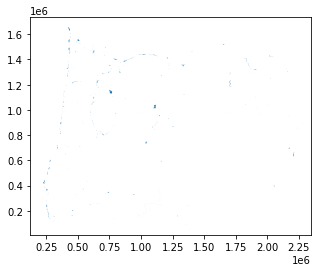

In [30]:
loc_path = "OR_state_parks/shapefiles/"

OR = download_shapefile(OR_link, loc_path)

OR.plot()

In [ ]:
#walk_ix = "https://edg.epa.gov/data/public/OP/SLD/Natl_WI_SHP.zip" #
walk_ix = "ftp://newftp.epa.gov/EPADataCommons/OP/Natl_WI_SHP.zip"

walk = download_shapefile(walk_ix, "walkability/")

In [16]:
#walk = pd.json_normalize(r.json())
walk

,currentVersion,id,name,type,description,geometryType,copyrightText,parentLayer,subLayers,minScale,...,advancedQueryCapabilities.supportsStatistics,advancedQueryCapabilities.supportsHavingClause,advancedQueryCapabilities.supportsCountDistinct,advancedQueryCapabilities.supportsOrderBy,advancedQueryCapabilities.supportsDistinct,advancedQueryCapabilities.supportsPagination,advancedQueryCapabilities.supportsTrueCurve,advancedQueryCapabilities.supportsReturningQueryExtent,advancedQueryCapabilities.supportsQueryWithDistance,advancedQueryCapabilities.supportsSqlExpression
0,10.8,0,NationalWalkabilityIndex,Feature Layer,The Walkabiliy Index dataset characterizes eve...,esriGeometryPolygon,,None,[],0,...,True,True,True,True,True,True,True,True,True,True


In [3]:
walk_ix = "ftp://newftp.epa.gov/EPADataCommons/OP/Natl_WI_SHP.zip"

with urllib.request.urlopen(walk_ix) as r:
    data = r.read()

In [4]:
data